In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)
    
    
#Sequence Vector Features    
#Training Features
training_features_path = "./Pickles/sv_training_features.pickle"
with open(training_features_path, 'rb') as data:
    sv_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/sv_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    sv_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/sv_test_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/sv_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/sv_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    sv_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/sv_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    sv_validation_labels = pickle.load(data)


In [3]:
print(tdidf_training_features.shape)
print(tdidf_test_features.shape)

(5760, 1000)
(720, 1000)


In [4]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [5]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [6]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(tdidf_training_features, tdidf_training_labels)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 431.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=8,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'C': [0.0001, 0.001, 0.01], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5], 'probability': [True]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [7]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.7605902777777778


In [8]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(tdidf_training_features, tdidf_training_labels)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid th

/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sgxdev/anaconda3/lib/python3.6/site-packages/

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=8,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'], 'probability': [True]}, {'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['poly'], 'degree': [3, 4, 5], 'probability': [True]}, {'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['rbf'], 'gamma': [1, 10, 100], 'probability': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [9]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.7766088023847098


In [10]:
best_svc = grid_search.best_estimator_

In [11]:
best_svc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=8,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
best_svc.fit(tdidf_training_features, tdidf_training_labels)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=8,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
svc_pred = best_svc.predict(tdidf_test_features)

In [16]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(tdidf_training_labels, best_svc.predict(tdidf_training_features)))

The training accuracy is: 
0.8177083333333334


In [18]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(tdidf_test_labels, svc_pred))

The test accuracy is: 
0.7930555555555555


In [19]:
# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,svc_pred))

Classification report
              precision    recall  f1-score   support

           1       0.81      0.82      0.81       130
           2       0.93      0.95      0.94       130
           3       0.80      0.88      0.84       113
           4       0.78      0.73      0.75       113
           5       0.69      0.69      0.69       110
           6       0.72      0.69      0.70       124

   micro avg       0.79      0.79      0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



In [20]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

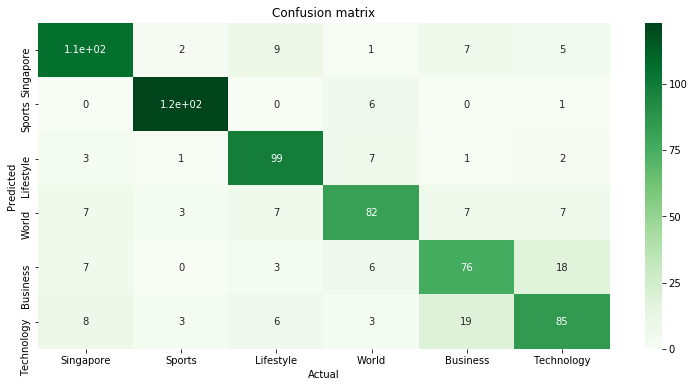

In [23]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [24]:
base_model = svm.SVC(random_state = 8)
base_model.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, base_model.predict(tdidf_test_features))

/Users/sgxdev/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.15694444444444444

In [25]:

best_svc.fit(tdidf_training_features, tdidf_training_labels)
accuracy_score(tdidf_test_labels, best_svc.predict(tdidf_test_features))

0.7930555555555555

In [26]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, best_svc.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [27]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.817708,0.793056


In [29]:
with open('Models/svm_best_model.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('Models/svm_best_model_details.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)